In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load the dataset
airbnb_data = pd.read_csv('/kaggle/input/singapore-airbnb/listings.csv')
# Explore the structure and statistics of the dataset
print(airbnb_data.head())
print(airbnb_data.describe())


      id                                 name  host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1  50646      Pleasant Room along Bukit Timah   227796    Sujatha   
2  56334                          COZICOMFORT   266763  Francesca   
3  71609  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4  71896      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180          

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


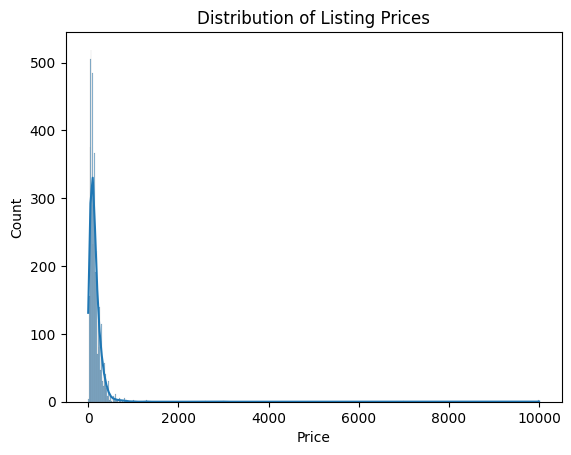

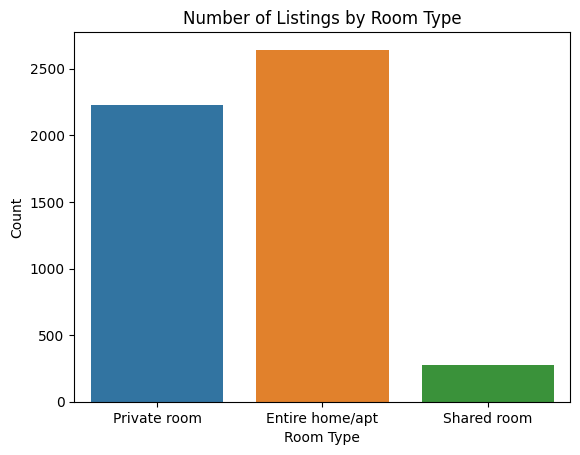

In [30]:
# Handle missing values
airbnb_data.dropna(inplace=True)
# Data visualization
sns.histplot(airbnb_data['price'], kde=True)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Listing Prices')
plt.show()

sns.countplot(x='room_type', data=airbnb_data)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Number of Listings by Room Type')
plt.show()

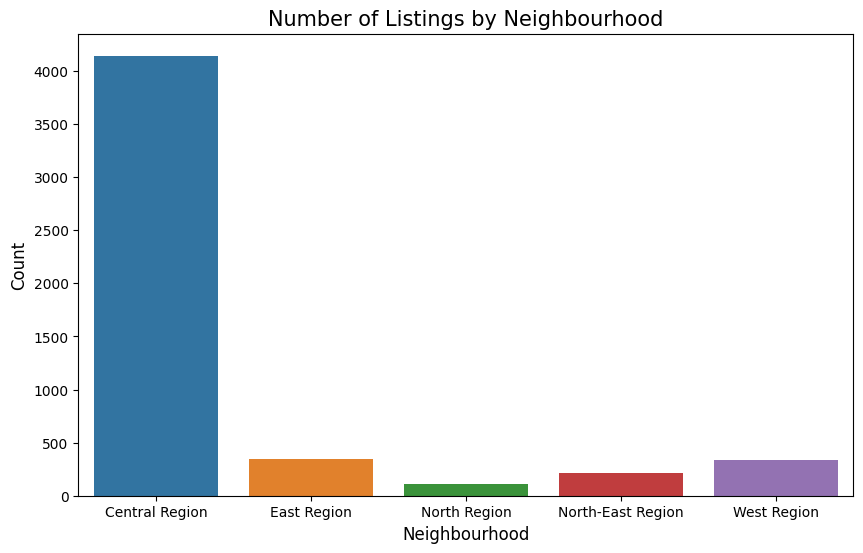

In [31]:
airbnb_data.rename(columns={'neighbourhood_group':'boroname'}, inplace=True)
borough_count = airbnb_data.groupby('boroname').agg('count').reset_index()

#Plot the count by borough
fig, ax1 = plt.subplots(1,1, figsize=(10,6)
                       )
sns.barplot(x='boroname', y='id', data=borough_count, ax=ax1)

ax1.set_title('Number of Listings by Neighbourhood', fontsize=15)
ax1.set_xlabel('Neighbourhood', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='both', labelsize=10)

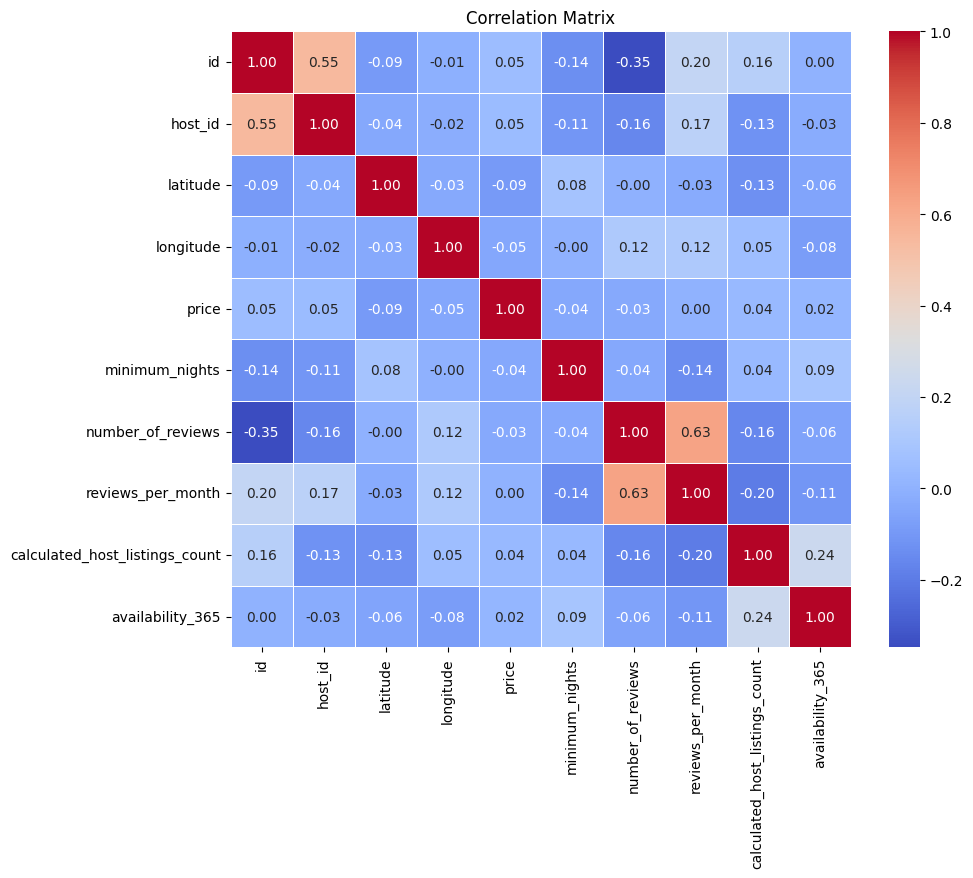

Correlation between price and number of reviews: -0.03355249134100488
Correlation between reviews per month and availability 365: -0.10847315370699387


In [34]:
# Compute correlation matrix for numeric columns
numeric_columns = airbnb_data.select_dtypes(include=[np.number]).columns
correlation_matrix = airbnb_data[numeric_columns].corr()

# Visualize correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Specific correlations
if 'price' in airbnb_data.columns and 'number_of_reviews' in airbnb_data.columns:
    price_reviews_corr = airbnb_data['price'].corr(airbnb_data['number_of_reviews'])
    print("Correlation between price and number of reviews:", price_reviews_corr)

if 'reviews_per_month' in airbnb_data.columns and 'availability_365' in airbnb_data.columns:
    reviews_availability_corr = airbnb_data['reviews_per_month'].corr(airbnb_data['availability_365'])
    print("Correlation between reviews per month and availability 365:", reviews_availability_corr)